In [55]:
import csv
import json
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

### LOAD DATA

In [79]:
def preprocess(article):
    article = article.encode('utf-8')
    article = str(article.lower())
    return removeTagsInterpuntion(article)

def removeTagsInterpuntion(article): #remove URL's, HTML-tags and interpuntion
    article = re.sub("^https?:\/\/.*[\r\n]*", '', article)
    article = re.sub('\\\\x\w\w', '', article)
    article = re.sub('[^a-z\s]', '', article)
    return article

def loadData(path, texts, labels, highLevelLabels = True):
    with open(path) as data_file:    
        data = json.load(data_file)
    for article in data:
        text = preprocess(article["content"])
        if len(text.split()) > 9 and article["category"] != "NOCAT": #Remove small sentences
            texts.append(text)
            if highLevelLabels:
                label = article["category"].split("|")
                labels.append(label[0])
            else:
                labels.append(article["category"])
    return texts, labels

texts = []
labels = []
paths = [r"C:\Users\PC-Axel\Documents\github\thesis\Data\PoliFLW Data\kamerstukken_topics_first.json",
        r"C:\Users\PC-Axel\Documents\github\thesis\Data\PoliFLW Data\kamerstukken_topics_second.json"]

for path in paths:
    texts, labels = loadData(path, texts, labels)

In [78]:
# def loadTestData(path, testTexts, category):
#     with open(path, 'rt', encoding="utf-8") as csvfile:
#         spamreader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONE)
#         for row in spamreader:
#             testTexts.append(row)
#     return testTexts, category

# testTexts = []
# category = []
# testPaths = [r"C:\Users\PC-Axel\Documents\GitHub\thesis\Data\Gemeente\Utrecht.csv",
#             r"C:\Users\PC-Axel\Documents\GitHub\thesis\Data\Gemeente\Amstelveen.csv",
#             r"C:\Users\PC-Axel\Documents\GitHub\thesis\Data\Gemeente\Arnhem.csv"]

# for path in testPaths:
#     testTexts, category = loadTestData(path, testTexts, category)

### SHOW TRAINING DATA

#### CATEGORY

Counter({'Zorg en gezondheid ': 4868, 'Openbare orde en veiligheid ': 3572, 'Internationaal ': 2787, 'Economie ': 2242, 'Natuur en milieu ': 1833, 'Recht ': 1694, 'Verkeer ': 1582, 'Onderwijs en wetenschap ': 1510, 'Financiën ': 1296, 'Bestuur ': 1256, 'Migratie en integratie ': 1131, 'Cultuur en recreatie ': 1119, 'Werk ': 869, 'Sociale zekerheid ': 848, 'Landbouw ': 845, 'Huisvesting ': 610, 'Ruimte en infrastructuur ': 213})


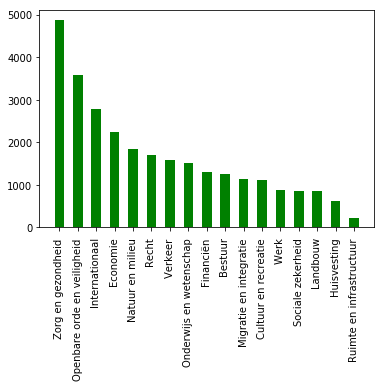

In [5]:
print(Counter(labels))
myDictionary = dict(Counter(labels))
list1, list2 = (list(t) for t in zip(*sorted(zip(myDictionary.values(), myDictionary.keys()), reverse=True)))
x = np.arange(len(list2))

plt.bar(x, list1, 0.52, color='g')
plt.xticks(x,list2, rotation='vertical')
plt.show()

#### CONTENT

In [29]:
amountCharacters = []
amountWords = []
amountUniqueWords = []

allWordsInDict = {}

splittedContent = []

for doc in texts:
    amountCharacters.append(len(doc))
    amountWords.append(len(doc.split()))
    amountUniqueWords.append(len(set(doc.split())))
    for word in set(doc.split()):
        if word not in allWordsInDict.keys():
            allWordsInDict[word] = 1
        else:
            allWordsInDict[word] += 1

In [52]:
print(sorted(allWordsInDict, key=allWordsInDict.get, reverse=True)[:50])

['van', 'aan', 'de', 'het', 'ingezonden', 'over', 'en', 'vraag', 'bvragen', 'u', 'dat', 'in', 'te', 'is', 'op', 'een', 'voor', 'niet', 'met', 'om', 'zo', 'zijn', 'deze', 'die', 'worden', 'x', 'noot', 'dit', 'er', 'bent', 'bij', 'heeft', 'ja', 'door', 'minister', 'wat', 'lid', 'welke', 'wordt', 'of', 'waarom', 'tot', 'als', 'ook', 'hoe', 'naar', 'nee', 'kunnen', 'ontvangen', 'mening']


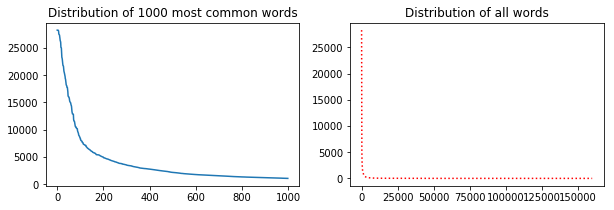

In [49]:
f = plt.figure(figsize=(10,3))

ax = f.add_subplot(121)
ax.set_title("Distribution of 1000 most common words")
y = sorted(allWordsInDict.values(),reverse = True)[:1000]
ax.plot(np.arange(len(y)), y)

ax = f.add_subplot(122)
ax.set_title("Distribution of all words")
y = sorted(allWordsInDict.values(),reverse = True)
ax.plot(np.arange(len(y)), y, 'r:')
plt.show()

The average amount of words is 560, min is 18 and max is 6608.


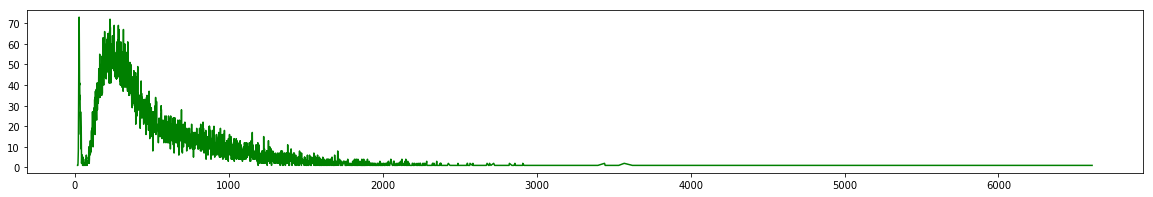

In [43]:
print("The average amount of words is %d, min is %d and max is %d." 
      % (sum(amountWords)/len(amountWords), min(amountWords), max(amountWords)))
myDictionary = dict(Counter(amountWords))
list1, list2 = (list(t) for t in zip(*sorted(zip(myDictionary.keys(), myDictionary.values()))))

plt.figure(figsize=(20,3))
plt.plot(list1, list2, color='g')
plt.show()

The average amount of characters is 3700, min is 118 and max is 41430.


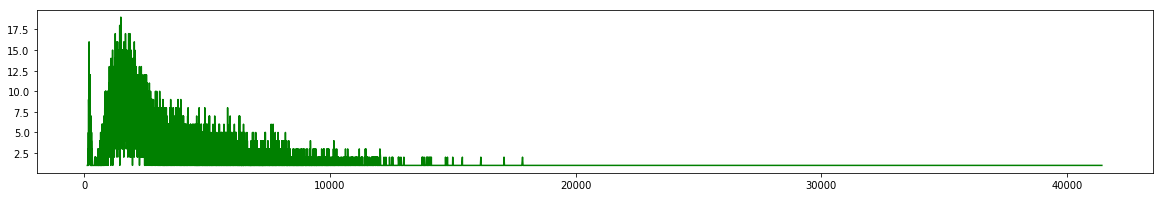

In [45]:
print("The average amount of characters is %d, min is %d and max is %d." 
      % (sum(amountCharacters)/len(amountCharacters), min(amountCharacters), max(amountCharacters)))
myDictionary = dict(Counter(amountCharacters))
list1, list2 = (list(t) for t in zip(*sorted(zip(myDictionary.keys(), myDictionary.values()))))

plt.figure(figsize=(20,3))
plt.plot(list1, list2, color='g')
plt.show()

The average amount of unique words is 228, min is 17 and max is 1460.


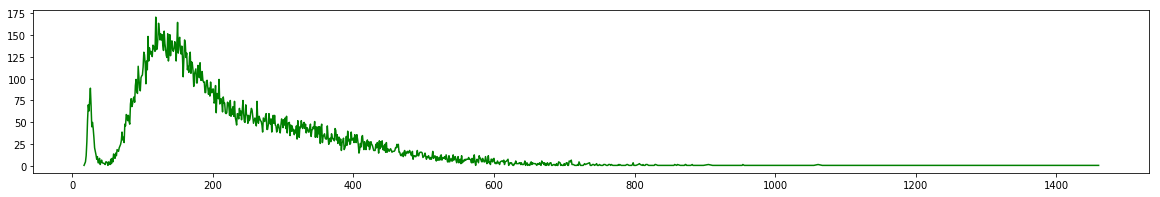

In [44]:
print("The average amount of unique words is %d, min is %d and max is %d." 
      % (sum(amountUniqueWords)/len(amountUniqueWords), min(amountUniqueWords), max(amountUniqueWords)))
myDictionary = dict(Counter(amountUniqueWords))
list1, list2 = (list(t) for t in zip(*sorted(zip(myDictionary.keys(), myDictionary.values()))))

plt.figure(figsize=(20,3))
plt.plot(list1, list2, color='g')
plt.show()

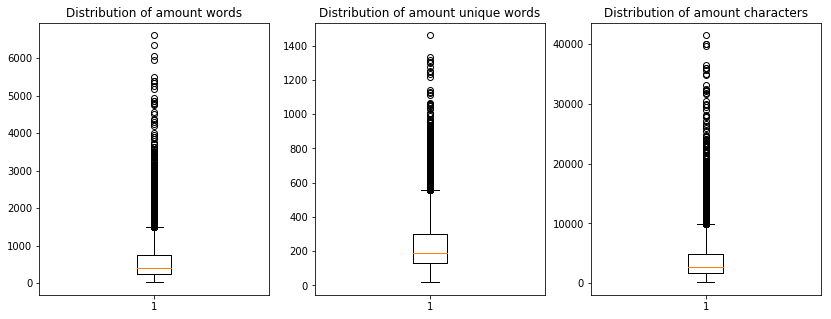

In [51]:
f = plt.figure(figsize=(14,5))

ax = f.add_subplot(131)
ax.set_title("Distribution of amount words")
plt.boxplot(amountWords)

ax = f.add_subplot(132)
ax.set_title("Distribution of amount unique words")
plt.boxplot(amountUniqueWords)

ax = f.add_subplot(133)
ax.set_title("Distribution of amount characters")
plt.boxplot(amountCharacters)

plt.show()

### TEST DATA